In [1]:
# Importando dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Abrindo arquivo
data = pd.read_csv("cars.csv")

In [3]:
# Apresentando as 5 primeiras linhas do dataset
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
# PERGUNTA 1 - Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 13.3+ KB


In [5]:
# PERGUNTA 1 - Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:
data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [6]:
#Convertendo colunas em numeric
data["cubicinches"] = pd.to_numeric(data["cubicinches"],errors='coerce')
data["weightlbs"] = pd.to_numeric(data["weightlbs"],errors='coerce')

In [7]:
# PERGUNTA 3 - Indique quais eram os índices dos valores presentes no dataset que "forçaram" o pandas a compreender a variável "cubicinches" como string.
data[pd.to_numeric(data['cubicinches'], errors='coerce').isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [8]:
# PERGUNTA 4 - Após a transformação das variáveis "string" para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?
data["cubicinches"].isnull().sum() + data["weightlbs"].isnull().sum()

5

In [9]:
# PERGUNTA 5 - Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna "weightlbs"?
data = data.fillna(data.mean())
round(data["weightlbs"].mean(),2)

3009.83

In [10]:
# PERGUNTA 6 - Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?
data["mpg"].median()

22.0

In [11]:
# PERGUNTA 7 - Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável "time-to-60"?
data["time-to-60"].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

In [12]:
# PERGUNTA 8 - Sobre o coeficiente de correlação de Pearson entre as variáveis "cylinders" e "mpg", é correto afirmar, EXCETO:
np.corrcoef(data["cylinders"], data["mpg"])[0, 1]

-0.7767098829879995

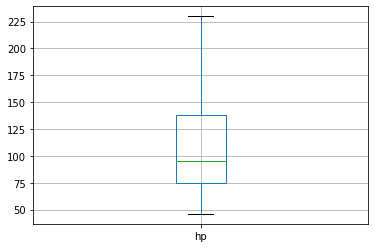

In [13]:
# PERGUNTA 9 -Sobre o boxplot da variável "hp", é correto afirmar, EXCETO:
boxplot = data.boxplot(column=['hp'])  #constroi o boxplot para as colunas desejadas

In [14]:
# PERGUNTA 10 - Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável "hp"?
df = pd.DataFrame(data, columns=['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year']).astype('float64')
scaled_features = StandardScaler().fit_transform(df)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
col_stats = ss.describe(scaled_features_df['hp'])
(_min,_max) = col_stats[1] # [Min/Max][Max Value]
_max

3.05870398977614

In [15]:
# PERGUNTA 11 - Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?
pca = decomposition.PCA(n_components=7, svd_solver='full')
pca.fit_transform(scaled_features_df)
round(pca.explained_variance_ratio_.cumsum()[0]*100)

72

In [16]:
# PERGUNTA 12 - Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:
#KMeans(n_clusters=3,random_state=42)
df = pd.DataFrame(data, columns=['mpg','cylinders','cubicinches']).astype('float64')
kmeans = KMeans(n_clusters=3, random_state=42).fit_predict(df)
pd.Series(kmeans).value_counts()

0    133
1     73
2     55
dtype: int64

In [17]:
# Pergunta 13 - Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. 
# Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. 
# Utilize as colunas  ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. 
# Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?
data['eficiente'] = np.where(data['mpg']>25,1,0)
df = pd.DataFrame(data, columns=['cylinders','cubicinches','hp','weightlbs','time-to-60']).astype('float64')
X = StandardScaler().fit_transform(df)
Y = data['eficiente']

X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
model_reg = LogisticRegression(random_state=42).fit(X_train,y_train)
y_pred = model_reg.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87        41\n           1       0.86      0.84      0.85        38\n\n    accuracy                           0.86        79\n   macro avg       0.86      0.86      0.86        79\nweighted avg       0.86      0.86      0.86        79\n'

In [18]:
estimator = DecisionTreeClassifier(random_state=42)
estimator.fit(X_train, y_train)
y_pred_2 = estimator.predict(x_test)
classification_report(y_test, y_pred_2)

'              precision    recall  f1-score   support\n\n           0       0.94      0.80      0.87        41\n           1       0.82      0.95      0.88        38\n\n    accuracy                           0.87        79\n   macro avg       0.88      0.88      0.87        79\nweighted avg       0.88      0.87      0.87        79\n'

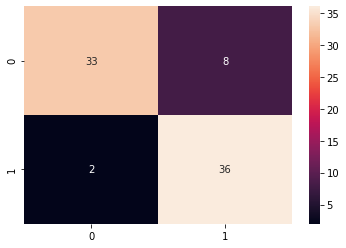

In [19]:
# PERGUNTA 14 - Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, 
# como mostrado anteriormente, é INCORRETO afirmar:
sns.heatmap(confusion_matrix(y_test ,y_pred_2), annot = True)

In [20]:
# PERGUNTA 15 - Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, 
# aplique o modelo de regressão logística como mostrado na descrição do trabalho. 
# Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar: